In [1]:
!pip install torch

In [2]:
!pip install torchvision

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
advertising = pd.read_csv('dataset/Advertising.csv', index_col=0)
advertising.sample(10)

,TV,radio,newspaper,sales
4,151.5,41.3,58.5,18.5
48,239.9,41.5,18.5,23.2
176,276.9,48.9,41.8,27.0
130,59.6,12.0,43.1,9.7
54,182.6,46.2,58.7,21.2
27,142.9,29.3,12.6,15.0
155,187.8,21.1,9.5,15.6
46,175.1,22.5,31.5,14.9
12,214.7,24.0,4.0,17.4
162,85.7,35.8,49.3,13.3


In [5]:
advertising.shape

(200, 4)

In [6]:
from sklearn import preprocessing

In [7]:
advertising[['TV']] = preprocessing.scale(advertising[['TV']])
advertising[['radio']] = preprocessing.scale(advertising[['radio']])
advertising[['newspaper']] = preprocessing.scale(advertising[['newspaper']])

In [8]:
advertising.sample(10)

,TV,radio,newspaper,sales
92,-1.383039,-1.469583,0.112594,7.3
200,0.993206,-0.990165,-1.005979,13.4
140,0.442057,1.393416,-1.328202,20.7
69,1.055093,0.286030,-0.900106,18.9
73,-1.404057,0.657409,-0.518042,8.8
107,-1.425075,-0.828109,-0.039311,7.2
142,0.544814,0.819466,2.073549,19.2
182,0.834400,-1.206241,-0.145184,12.2
52,-0.544639,-0.922642,-1.240742,10.7
174,0.249389,-1.091451,-0.817249,11.7


In [9]:
X = advertising.drop('sales', axis=1)
Y = advertising[['sales']]

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
x_train.shape, y_train.shape

((160, 3), (160, 1))

In [12]:
x_test.shape, y_test.shape

((40, 3), (40, 1))

In [13]:
import torch

In [14]:
x_train_tensor = torch.tensor(x_train.values, dtype= torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype= torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype= torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype= torch.float)

In [15]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([160, 3]), torch.Size([160, 1]))

In [16]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([40, 3]), torch.Size([40, 1]))

In [17]:
inp = 3
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

In [20]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.ReLU(),
                           torch.nn.Linear(hid, out))

In [21]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
for iter in range(10000):
    
    y_pred = model(x_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter % 1000 ==0:
        print(iter, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()

0 231.8016357421875
1000 139.34852600097656
2000 44.26993942260742
3000 11.086934089660645
4000 6.941374778747559
5000 5.001476287841797
6000 3.352170944213867
7000 2.0192065238952637
8000 1.1109497547149658
9000 0.5754603147506714


In [28]:
y_pred_tensor = model(x_test_tensor)
y_pred_tensor[:5]

tensor([[10.0431],
        [ 8.1998],
        [ 9.1690],
        [25.6737],
        [11.5525]], grad_fn=<SliceBackward0>)

In [30]:
y_pred = y_pred_tensor.detach().numpy()
y_pred[:5]

array([[10.043127 ],
       [ 8.199806 ],
       [ 9.1689625],
       [25.67371  ],
       [11.552494 ]], dtype=float32)

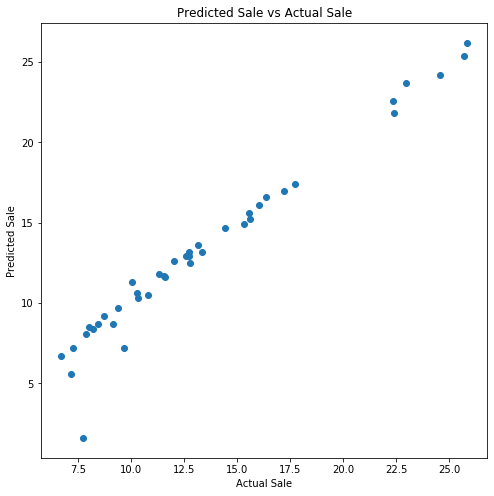

In [31]:
plt.figure(figsize=(8,8))

plt.scatter(y_pred, y_test.values)

plt.xlabel("Actual Sale")
plt.ylabel("Predicted Sale")

plt.title("Predicted Sale vs Actual Sale")
plt.show()

In [32]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9583527694266633